# INSTALL DARKNET

## Configuring cuDNN on Colab for YOLOv4



In [1]:
# CUDA: Let's check that Nvidia CUDA drivers are already pre-installed and which version is it.
!/usr/local/cuda/bin/nvcc --version
# We need to install the correct cuDNN according to this output

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [2]:
#take a look at the kind of GPU we have
!nvidia-smi

Thu Oct 21 14:58:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# This cell ensures you have the correct architecture for your respective GPU
# If you command is not found, look through these GPUs, find the respective
# GPU and add them to the archTypes dictionary

# Tesla V100
# ARCH= -gencode arch=compute_70,code=[sm_70,compute_70]

# Tesla K80 
# ARCH= -gencode arch=compute_37,code=sm_37

# GeForce RTX 2080 Ti, RTX 2080, RTX 2070, Quadro RTX 8000, Quadro RTX 6000, Quadro RTX 5000, Tesla T4, XNOR Tensor Cores
# ARCH= -gencode arch=compute_75,code=[sm_75,compute_75]

# Jetson XAVIER
# ARCH= -gencode arch=compute_72,code=[sm_72,compute_72]

# GTX 1080, GTX 1070, GTX 1060, GTX 1050, GTX 1030, Titan Xp, Tesla P40, Tesla P4
# ARCH= -gencode arch=compute_61,code=sm_61

# GP100/Tesla P100 - DGX-1
# ARCH= -gencode arch=compute_60,code=sm_60

# For Jetson TX1, Tegra X1, DRIVE CX, DRIVE PX - uncomment:
# ARCH= -gencode arch=compute_53,code=[sm_53,compute_53]

# For Jetson Tx2 or Drive-PX2 uncomment:
# ARCH= -gencode arch=compute_62,code=[sm_62,compute_62]
import os
os.environ['GPU_TYPE'] = str(os.popen('nvidia-smi --query-gpu=name --format=csv,noheader').read())

def getGPUArch(argument):
  try:
    argument = argument.strip()
    # All Colab GPUs
    archTypes = {
        "Tesla V100-SXM2-16GB": "-gencode arch=compute_70,code=[sm_70,compute_70]",
        "Tesla K80": "-gencode arch=compute_37,code=sm_37",
        "Tesla T4": "-gencode arch=compute_75,code=[sm_75,compute_75]",
        "Tesla P40": "-gencode arch=compute_61,code=sm_61",
        "Tesla P4": "-gencode arch=compute_61,code=sm_61",
        "Tesla P100-PCIE-16GB": "-gencode arch=compute_60,code=sm_60",
        "NVIDIA GeForce GTX 1070": "-gencode arch=compute_61,code=sm_61"

      }
    return archTypes[argument]
  except KeyError:
    return "GPU must be added to GPU Commands"
os.environ['ARCH_VALUE'] = getGPUArch(os.environ['GPU_TYPE'])

print("GPU Type: " + os.environ['GPU_TYPE'])
print("ARCH Value: " + os.environ['ARCH_VALUE'])

GPU Type: Tesla K80

ARCH Value: -gencode arch=compute_37,code=sm_37


### Installing Darknet for YOLOv4 on Colab




In [4]:
#If Colab.. clone from roboflow
#in local (cudnn 8) clone from normal
is_colab=True
if is_colab:
    DARKNET = "/content/darknet"
    PARENT = "/content"
    !git clone https://github.com/roboflow-ai/darknet.git {DARKNET}
    #!git clone https://github.com/pjreddie/darknet.git
else:
    DARKNET = "carpeta aca!"
    !git clone https://github.com/AlexeyAB/darknet.git {DARKNET}
PARENT = os.path.dirname(DARKNET)


Cloning into '/content/darknet'...
remote: Enumerating objects: 13289, done.
remote: Total 13289 (delta 0), reused 0 (delta 0), pack-reused 13289
Receiving objects: 100% (13289/13289), 12.13 MiB | 16.83 MiB/s, done.
Resolving deltas: 100% (9105/9105), done.


In [ ]:
#install environment from the Makefile
#BUILD.. only one
%cd {DARKNET}

#install environment from the Makefile
#note if you are on Colab Pro this works on a P100 GPU
#if you are on Colab free, you may need to change the Makefile for the K80 GPU
#this goes for any GPU, you need to change the Makefile to inform darknet which GPU you are running on.
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!sed -i "s/ARCH= -gencode arch=compute_60,code=sm_60/ARCH= ${ARCH_VALUE}/g" Makefile
!make

### Getting default weigths

In [ ]:
#download the newly released yolov4-tiny weights
%cd {DARKNET}
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.weights
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29

!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4.weights
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4.conv.137

# Set up Custom Dataset for YOLOv4

In [13]:
%cd /content
!gdown --id 1sB19RUVQSWvEnQwWE8Fu-tOaK4-AIsCH

Downloading...
From: https://drive.google.com/uc?id=1sB19RUVQSWvEnQwWE8Fu-tOaK4-AIsCH
To: /content/darknet/Synthetic Fruit.v1-raw.darknet.zip
100% 211M/211M [00:02<00:00, 81.6MB/s]


In [ ]:
ZIP = "/content/Synthetic\ Fruit.v1-raw.darknet.zip"
!unzip {ZIP} -d/content/data

In [18]:
DARKNET = r"/content/darknet"
DATA = r"/content/data"
CONFIG = r"/content/data/train"

In [ ]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

In [20]:
# copy annotations
yolo_config_name = 'y4t-custom'
class_names=None

with open(f"{CONFIG}/_darknet.labels", "r") as f:
      class_names = [cname.strip() for cname in f.readlines()]
num_classes = len(class_names)
width = 416
height = 416
yolo_base_type = 'tiny' #tiny
# yolo_base_type = None # normal
do_split=False

In [22]:
#Clean darknet folder
if os.path.exists(f"{DARKNET}/data/obj") and os.path.isdir(f"{DARKNET}/data/obj"):
    !cd {DARKNET} && rm data/obj/*.*
else:
    !mkdir {DARKNET}/data/obj 

In [23]:
#Set up training file directories for custom dataset

%cp {CONFIG}/_darknet.labels {DARKNET}/data/obj.names
#%mkdir data/obj
#copy image and labels
if do_split:
  %cp {DATA}/*.jpg {DATA}/*.tx {DARKNET}/data/obj/
else:
  %cp {DATA}/train/*.jpg {DATA}/train/*.txt {DARKNET}/data/obj/
  %cp {DATA}/valid/*.jpg {DATA}/valid/*.txt {DARKNET}/data/obj/

## Create data with training info


In [30]:
%cd {DARKNET}
with open('data/obj.data', 'w') as out:
  out.write(f'classes = {num_classes}\n')
  out.write('train = data/train.txt\n')
  out.write('valid = data/valid.txt\n')
  out.write('names = data/obj.names\n')
  out.write('backup = backup/')

import os
from tqdm.auto import tqdm

split = .9
if not do_split:
    train_files = [f for f in os.listdir(f'{DATA}/train') if f.endswith('jpg')]
    valid_files = [f for f in os.listdir(f'{DATA}/valid') if f.endswith('jpg')]
else:
    import random
    #set seed .. for reproducibility!...
    files  = [ffile for ffile in os.listdir(DATA) if ".txt" not in ffile]
    random.shuffle(files)
    N=len(files)
    train_files = files[:int(N*split)]
    valid_files = files[int(N*split):]
    
#write train file (just the image list)
with open('data/train.txt', 'w') as out:
  for img in train_files:
    out.write('data/obj/' + img + '\n')

#write the valid file (just the image list)
with open('data/valid.txt', 'w') as out:
  for img in valid_files:
    out.write('data/obj/' + img + '\n')


/content/darknet


# Write Custom Training Config for YOLOv4

## Obtengo ANCHORS
esto ayuda a mejorar el modelo

In [ ]:
#Check anchors
%cd {DARKNET}
!./darknet detector calc_anchors data/obj.data -num_of_clusters 6 -width {width} -height {height} -show

## Gen cfg file

In [44]:
#we build config dynamically based on number of classes
#we build iteratively from base config files. This is the same file shape as cfg/yolo-obj.cfg
%cd {DARKNET}

num_classes = file_len('data/obj.names')
#Instructions from the darknet repo
#change line max_batches to (classes*2000 but not less than number of training images, and not less than 6000), 
# f.e. max_batches=6000 if you train for 3 classes
#change line steps to 80% and 90% of max_batches, f.e. steps=4800,5400
max_batches = num_classes*2000 if num_classes>3 else 6000
# Nerdearla... 
if True:
  max_batches=min(max_batches,4000)
steps1 = .8 * max_batches # step lr.. 
steps2 = .9 * max_batches # step lr.. 
steps_str = str(steps1)+','+str(steps2)
num_filters = (num_classes + 5) * 3


print("writing config for a custom YOLOv4 detector detecting number of classes: " + str(num_classes))

if os.path.exists(f'./cfg/{yolo_config_name}.cfg'): os.remove(f'./cfg/{yolo_config_name}.cfg')


#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

/content/darknet
writing config for a custom YOLOv4 detector detecting number of classes: 63


In [45]:
%%writetemplate ./cfg/{yolo_config_name}.cfg
[net]
#like the number of subdivisions 64 runs faster but Colab GPU may not be big enough
#if Colab GPU memory is too small, you will need to adjust subdivisions to 16
# Testing
#batch=1
#subdivisions=1
# Training
batch=32
subdivisions=2
width={width}
height={height}
channels=3
momentum=0.9
decay=0.0005
angle=30
flip=0
saturation = 1.5
exposure = 1.5
hue=.1
blur=1
aspect=.75
jitter=0.3
gaussian_noise=1
scale_x_y = 1.05
resize=1.5


learning_rate=0.00261
burn_in=1000
max_batches = {max_batches}
policy=steps
steps={steps_str}
scales=.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[route]
layers=-1
groups=2
group_id=1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[route]
layers = -1,-2

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[route]
layers = -6,-1

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[route]
layers=-1
groups=2
group_id=1

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[route]
layers = -1,-2

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[route]
layers = -6,-1

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[route]
layers=-1
groups=2
group_id=1

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[route]
layers = -1,-2

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[route]
layers = -6,-1

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

##################################

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

[convolutional]
size=1
stride=1
pad=1
filters={num_filters}
activation=linear



[yolo]
mask = 3,4,5
anchors = 10,14,  23,27,  37,58,  81,82,  135,169,  344,319
#anchors =  13,38,  21,65,  24,102,  34,85,  38,116,  54,123
#anchors =  27, 70,  30, 66,  34, 71,  35, 70,  36, 68,  38, 66
classes={num_classes}
num=6
jitter=.3
scale_x_y = 1.05
cls_normalizer=1.0
iou_normalizer=0.07
iou_loss=ciou
ignore_thresh = .7
truth_thresh = 1
random=0
nms_kind=greedynms
beta_nms=0.6

[route]
layers = -4

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[upsample]
stride=2

[route]
layers = -1, 23

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[convolutional]
size=1
stride=1
pad=1
filters={num_filters}
activation=linear

[yolo]
mask = 1,2,3
anchors = 10,14,  23,27,  37,58,  81,82,  135,169,  344,319
classes={num_classes}
num=6
jitter=.3
scale_x_y = 1.05
cls_normalizer=1.0
iou_normalizer=0.07
iou_loss=ciou
ignore_thresh = .7
truth_thresh = 1
random=0
nms_kind=greedynms
beta_nms=0.6

In [46]:
#%cat cfg/{yolo_config_name}.cfg

# Train Custom YOLOv4 Detector

In [47]:
if yolo_base_type is None:
    base_model = "yolov4.conv.137"
elif yolo_base_type== "tiny":
    base_model =" yolov4-tiny.conv.29"
else:
    raise Exception("...")
!./darknet detector train data/obj.data cfg/{yolo_config_name}.cfg {base_model} -dont_show -map
#If you get CUDA out of memory adjust subdivisions above!
#adjust max batches down for shorter training above

Se truncaron las últimas líneas 5000 del resultado de transmisión.
 Last accuracy mAP@0.5 = 59.91 %, best = 59.91 % 
 3036: 1.395924, 1.546544 avg loss, 0.002610 rate, 0.866000 seconds, 97152 images, 0.274303 hours left
Loaded: 0.000068 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 59.91 %, best = 59.91 % 
 3037: 1.987292, 1.590619 avg loss, 0.002610 rate, 0.849620 seconds, 97184 images, 0.273879 hours left
Loaded: 0.000089 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 59.91 %, best = 59.91 % 
 3038: 2.092702, 1.640827 avg loss, 0.002610 rate, 0.857161 seconds, 97216 images, 0.273413 hours left
Loaded: 0.000049 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 59.91 %, best = 59.91 % 
 3039: 1.997057, 1.676450 avg loss, 0.002610 rate, 0.850259 seconds, 97248 images, 0.272970 hours left
Loaded: 0.000049 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 59.91 %, best = 

# Infer Custom Objects with Saved YOLOv4 Weights

In [48]:
#define utility function
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

check if weigths have saved yet
* backup houses the last weights for our detector
* (file yolo-obj_last.weights will be saved to the build\darknet\x64\backup\ for each 100 iterations)
* (file yolo-obj_xxxx.weights will be saved to the build\darknet\x64\backup\ for each 1000 iterations)

After training is complete - get result yolo-obj_final.weights from path build\darknet\x64\backup

if it is empty you haven't trained for long enough yet, you need to train for at least 100 iterations

In [52]:
#coco.names is hardcoded somewhere in the detector
%cp {CONFIG}/_darknet.labels {DARKNET}/data/coco.names

/content/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 370, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 x 104 x 128 
   9 max                2x 2/ 2    1

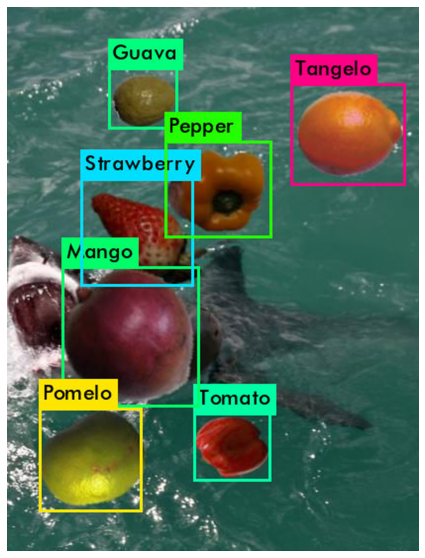

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 370, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 x 104 x 128 
   9 max                2x 2/ 2    104 x 104 x 128 ->

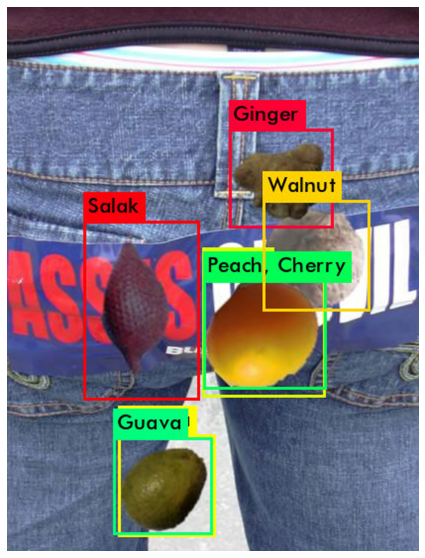

In [54]:
#/test has images that we can test our detector on
%cd {DARKNET}
test_images = [f for f in os.listdir(f'{DATA}/valid') if f.endswith('.jpg')]
import random

for img_path in random.sample(test_images, 2):
    #test out our detector!
    img_path = f"{DATA}/valid/" + img_path

    !./darknet detect cfg/{yolo_config_name}.cfg backup/{yolo_config_name}_final.weights {img_path} -dont-show
    imShow('predictions.jpg')